In [1]:
# Task 7: Support Vector Machines (SVM)

In [ ]:
#  1.Load and prepare a dataset for binary classification

In [2]:
# importing library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# importing dataset

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
data=load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [41]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["target"]=data.target

In [42]:
# exploring basic info of dataset

In [136]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [137]:
df.shape 

(569, 31)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [47]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [48]:
df.isna()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [50]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [51]:
# selecting the features and target columns

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
X=df.drop(columns=["target"]) 
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [55]:
y=df["target"] 
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [57]:
print(df["target"].head()) 

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [58]:
print(df["target"].tail()) 

564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int32


In [59]:
print(df["target"].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [60]:
# 2.Training an SVM with linear and RBF kernel.

In [61]:
# importing library

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Training SVM (Linear Kernel)

In [65]:
svm_linear=SVC(kernel='linear',C=1.0)
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [66]:
# Training SVM (RBF Kernel)

In [67]:
svm_rbf=SVC(kernel='rbf',C=1.0,gamma='scale')
svm_rbf.fit(X_train_scaled,y_train)

SVC()

In [69]:
# predictions

In [70]:
y_pred_linear=svm_linear.predict(X_test_scaled)
y_pred_linear

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [71]:
y_pred_rbf=svm_rbf.predict(X_test_scaled)
y_pred_rbf

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [72]:
# evaluation

In [74]:
print("Linear Kernel SVM")
print("Accuracy:",accuracy_score(y_test,y_pred_linear))
print(classification_report(y_test,y_pred_linear))

Linear Kernel SVM
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [75]:
print("RBF Kernel SVM")
print("Accuracy:",accuracy_score(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))

RBF Kernel SVM
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [76]:
# 3.Visualize decision boundary using 2D data.

In [ ]:
# selecting target values

In [78]:
X1=data.data[:, :2]
X1

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [ ]:
# Split and scale

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Creating meshgrid for plotting

In [80]:
x_min,x_max=X_train_scaled[:, 0].min()-1,X_train_scaled[:, 0].max()+1
y_min,y_max=X_train_scaled[:, 1].min()-1,X_train_scaled[:, 1].max()+1
xx,yy=np.meshgrid(np.linspace(x_min, x_max, 500),np.linspace(y_min, y_max, 500))

In [81]:
# Plotting decision boundary

In [139]:
def plot_decision_boundary(model, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.grid(True)
    plt.show()
    plot_decision_boundary(model, "SVM Decision Boundary (RBF Kernel)")

In [84]:
# Training SVMs

In [85]:
svm_linear=SVC(kernel='linear',C=1.0)
svm_linear.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [86]:
svm_rbf=SVC(kernel='rbf',C=1.0,gamma='scale')
svm_rbf.fit(X_train_scaled,y_train)

SVC()

In [87]:
# Plotting both

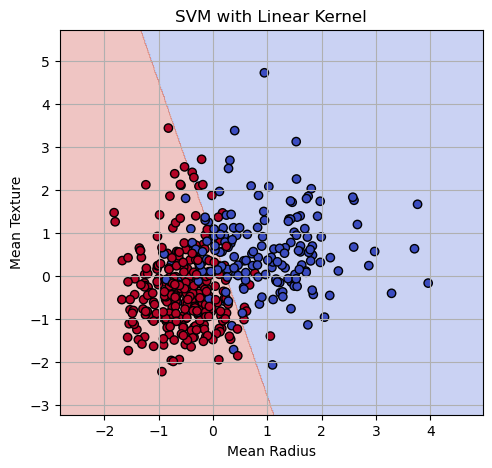

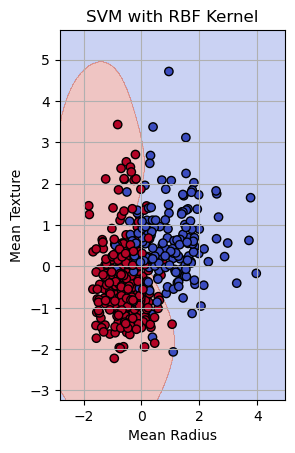

<Figure size 640x480 with 0 Axes>

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_boundary(svm_linear,"SVM with Linear Kernel")
plt.subplot(1,2,2)
plot_decision_boundary(svm_rbf,"SVM with RBF Kernel")
plt.tight_layout()
plt.show()

In [89]:
# 4.Tune hyperparameters like C and gamma.

In [90]:
# importing library

In [91]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Define parameter grid

In [106]:
param_grid_rbf={'C': [0.1, 1, 10, 100],'gamma': ['scale', 0.001, 0.01, 0.1, 1],'kernel': ['rbf']}

In [107]:
param_grid_lin={'C': [0.1, 1, 10, 100],'gamma': ['scale', 0.001, 0.01, 0.1, 1],'kernel': ['linear']}

In [99]:
# Grid search with 5-fold CV

In [110]:
grid_rbf=GridSearchCV(SVC(),param_grid_rbf,cv=5,verbose=1,n_jobs=-1)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear']},
             verbose=1)

In [111]:
grid_lin=GridSearchCV(SVC(),param_grid_lin,cv=5,verbose=1,n_jobs=-1)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear']},
             verbose=1)

In [101]:
# Best parameters and model

In [102]:
print("Best Parameters:",grid.best_params_)
best_model=grid.best_estimator_

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [103]:
# Evaluate

In [104]:
y_pred=best_model.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.93      0.93      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [112]:
#  5.Use cross-validation to evaluate performance

In [113]:
# importing library

In [114]:
from sklearn.model_selection import cross_val_score

In [122]:
# standardization

In [123]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [124]:
# Defining SVM model

In [125]:
model_rbf=SVC(kernel='rbf',C=10,gamma=0.01)

In [126]:
model_lin=SVC(kernel='linear',C=10,gamma=0.01)

In [127]:
# Cross-validation with 5 folds

In [132]:
cv_scores_rbf=cross_val_score(model_rbf,X_scaled,y,cv=5,scoring='accuracy')

In [131]:
cv_scores_lin=cross_val_score(model_lin,X_scaled,y,cv=5,scoring='accuracy')

In [133]:
print("Cross-validation scores:",cv_scores_rbf)
print("Cross-validation scores:",cv_scores_lin)

Cross-validation scores: [0.84210526 0.87719298 0.90350877 0.93859649 0.91150442]
Cross-validation scores: [0.84210526 0.86842105 0.88596491 0.9122807  0.89380531]


In [134]:
print("Average Accuracy: {:.4f}".format(np.mean(cv_scores_rbf)))
print("Average Accuracy: {:.4f}".format(np.mean(cv_scores_lin)))

Average Accuracy: 0.8946
Average Accuracy: 0.8805


In [135]:
print("Standard Deviation: {:.4f}".format(np.std(cv_scores_rbf)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores_lin)))

Standard Deviation: 0.0327
Standard Deviation: 0.0238
